In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Read the CSV File Using Pandas read_csv function
df = pd.read_csv('dataset.csv')

# print the concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
Subject ID    373 non-null object
MRI ID        373 non-null object
Group         373 non-null object
Visit         373 non-null int64
MR Delay      373 non-null int64
M/F           373 non-null object
Hand          373 non-null object
Age           373 non-null int64
EDUC          373 non-null int64
SES           354 non-null float64
MMSE          371 non-null float64
CDR           373 non-null float64
eTIV          373 non-null int64
nWBV          373 non-null float64
ASF           373 non-null float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [3]:
# print("Total Rows and Columns (Rows,Columns) : ",df.shape)
#print first five rows of the dataset
df.head(5)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [4]:
#print concise summery of the dataset
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [5]:
#since the dataset contain null values also 
#count total rows in each column which contain null values
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [6]:
#'duplicated()' function in pandas return the duplicate row as True and other as False
#for counting the duplicate elements we sum all the rows
sum(df.duplicated())

0

In [7]:
#fill null value with their column mean and median
df["SES"].fillna(df["SES"].median(), inplace=True)
df["MMSE"].fillna(df["MMSE"].mean(), inplace=True)

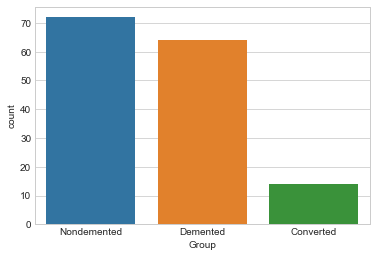

In [8]:
#see how many people have Alzheimer
#same person visits two or more time so only take the single visit data
sns.set_style("whitegrid")
ex_df = df.loc[df['Visit'] == 1]
sns.countplot(x='Group', data=ex_df)

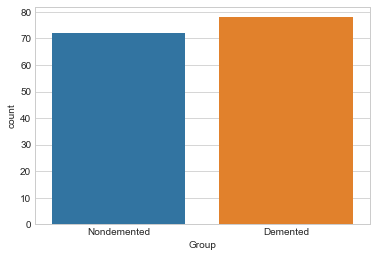

In [9]:
#We have three groups so convert Converted Group Into Demented

ex_df['Group'] = ex_df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
sns.countplot(x='Group', data=ex_df)

              F   M
Demented     38  40
Nondemented  50  22


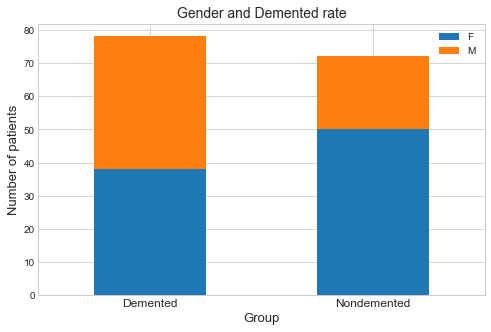

In [10]:
# bar drawing function
def bar_chart(feature):
    Demented = ex_df[ex_df['Group']=='Demented'][feature].value_counts()
    Nondemented = ex_df[ex_df['Group']=='Nondemented'][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))
    print(df_bar)
                
                
# Gender  and  Group ( Female=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group',fontsize=13)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel('Number of patients',fontsize=13)
plt.legend()
plt.title('Gender and Demented rate',fontsize=14)
plt.show()

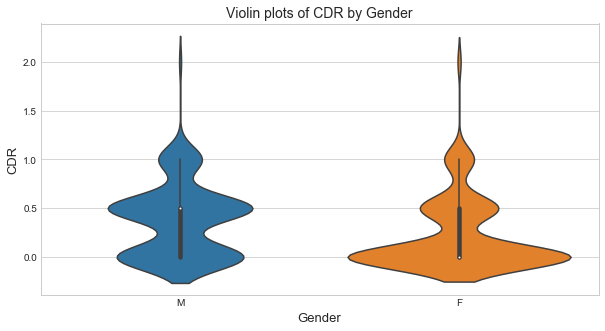

In [11]:
plt.figure(figsize=(10,5))
sns.violinplot(x='M/F', y='CDR', data=df)
plt.title('Violin plots of CDR by Gender',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('CDR',fontsize=13)
plt.show()

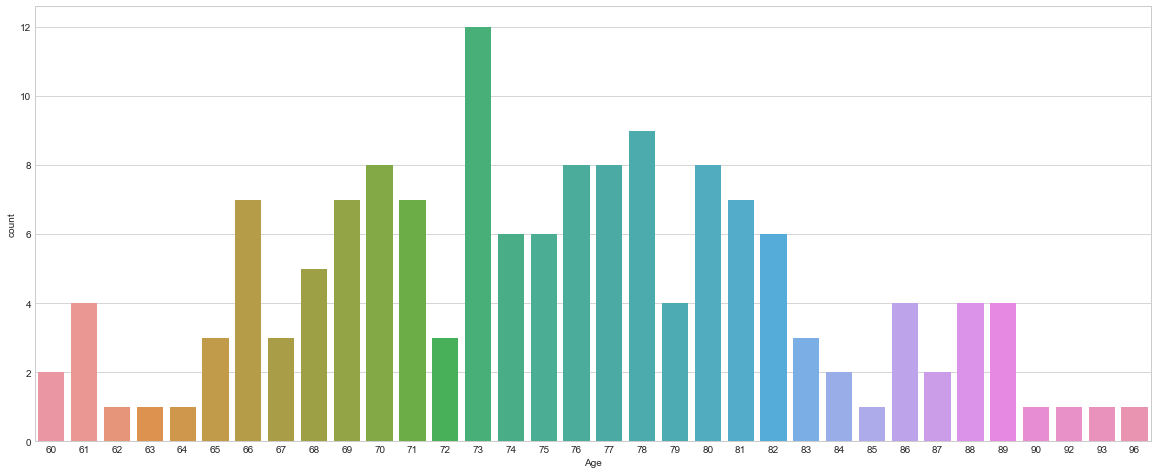

In [12]:
ax = sns.countplot(x='Age', data=ex_df)
ax.figure.set_size_inches(20,8)

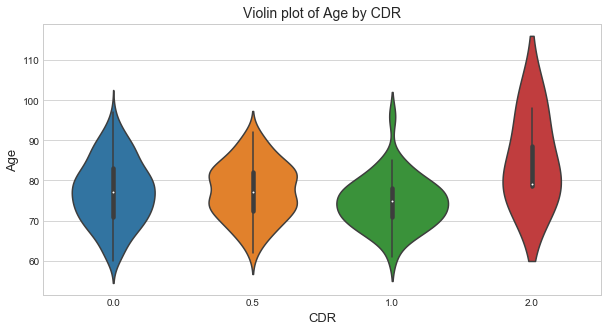

In [13]:
plt.figure(figsize=(10,5))
sns.violinplot(x='CDR', y='Age', data=df)
plt.title('Violin plot of Age by CDR',fontsize=14)
plt.xlabel('CDR',fontsize=13)
plt.ylabel('Age',fontsize=13)
plt.show()

(15, 40)

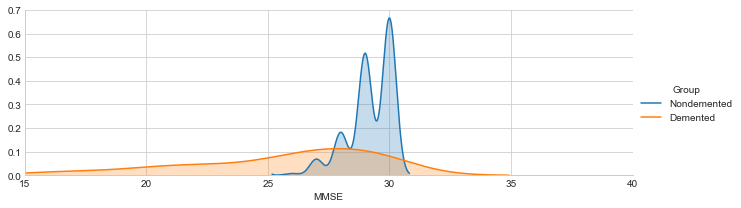

In [14]:
#MMSE Vs Non-demented and demented
facet= sns.FacetGrid(df,hue="Group",aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15,40)

(50, 100)

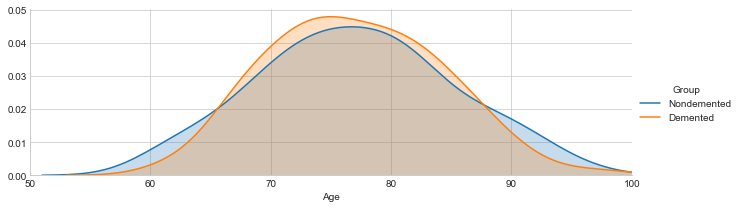

In [15]:
#AGE vs Non-demented and demented
facet= sns.FacetGrid(df,hue="Group",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

> **There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.**

In [16]:
#find the outliers in each of the column
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

list_atributes = ['MR Delay','EDUC', "SES", "MMSE", 'eTIV', "nWBV", "ASF"]
print("Outliers: \n")
for item in list_atributes:
    print(item,': ',outliers_iqr(df[item]))

Outliers: 

MR Delay :  (array([ 32,  71,  75, 153, 159, 160, 265, 369], dtype=int64),)
EDUC :  (array([107, 108, 109], dtype=int64),)
SES :  (array([136, 137, 138, 161, 162, 179, 180], dtype=int64),)
MMSE :  (array([  4,  25,  26,  43,  44,  51,  52,  60,  88,  89,  90,  93,  94,
        97,  98,  99, 100, 101, 105, 106, 138, 162, 172, 173, 184, 185,
       186, 222, 225, 226, 231, 232, 234, 251, 299, 300, 316, 317, 328,
       332, 360, 366], dtype=int64),)
eTIV :  (array([0, 1], dtype=int64),)
nWBV :  (array([], dtype=int64),)
ASF :  (array([282], dtype=int64),)


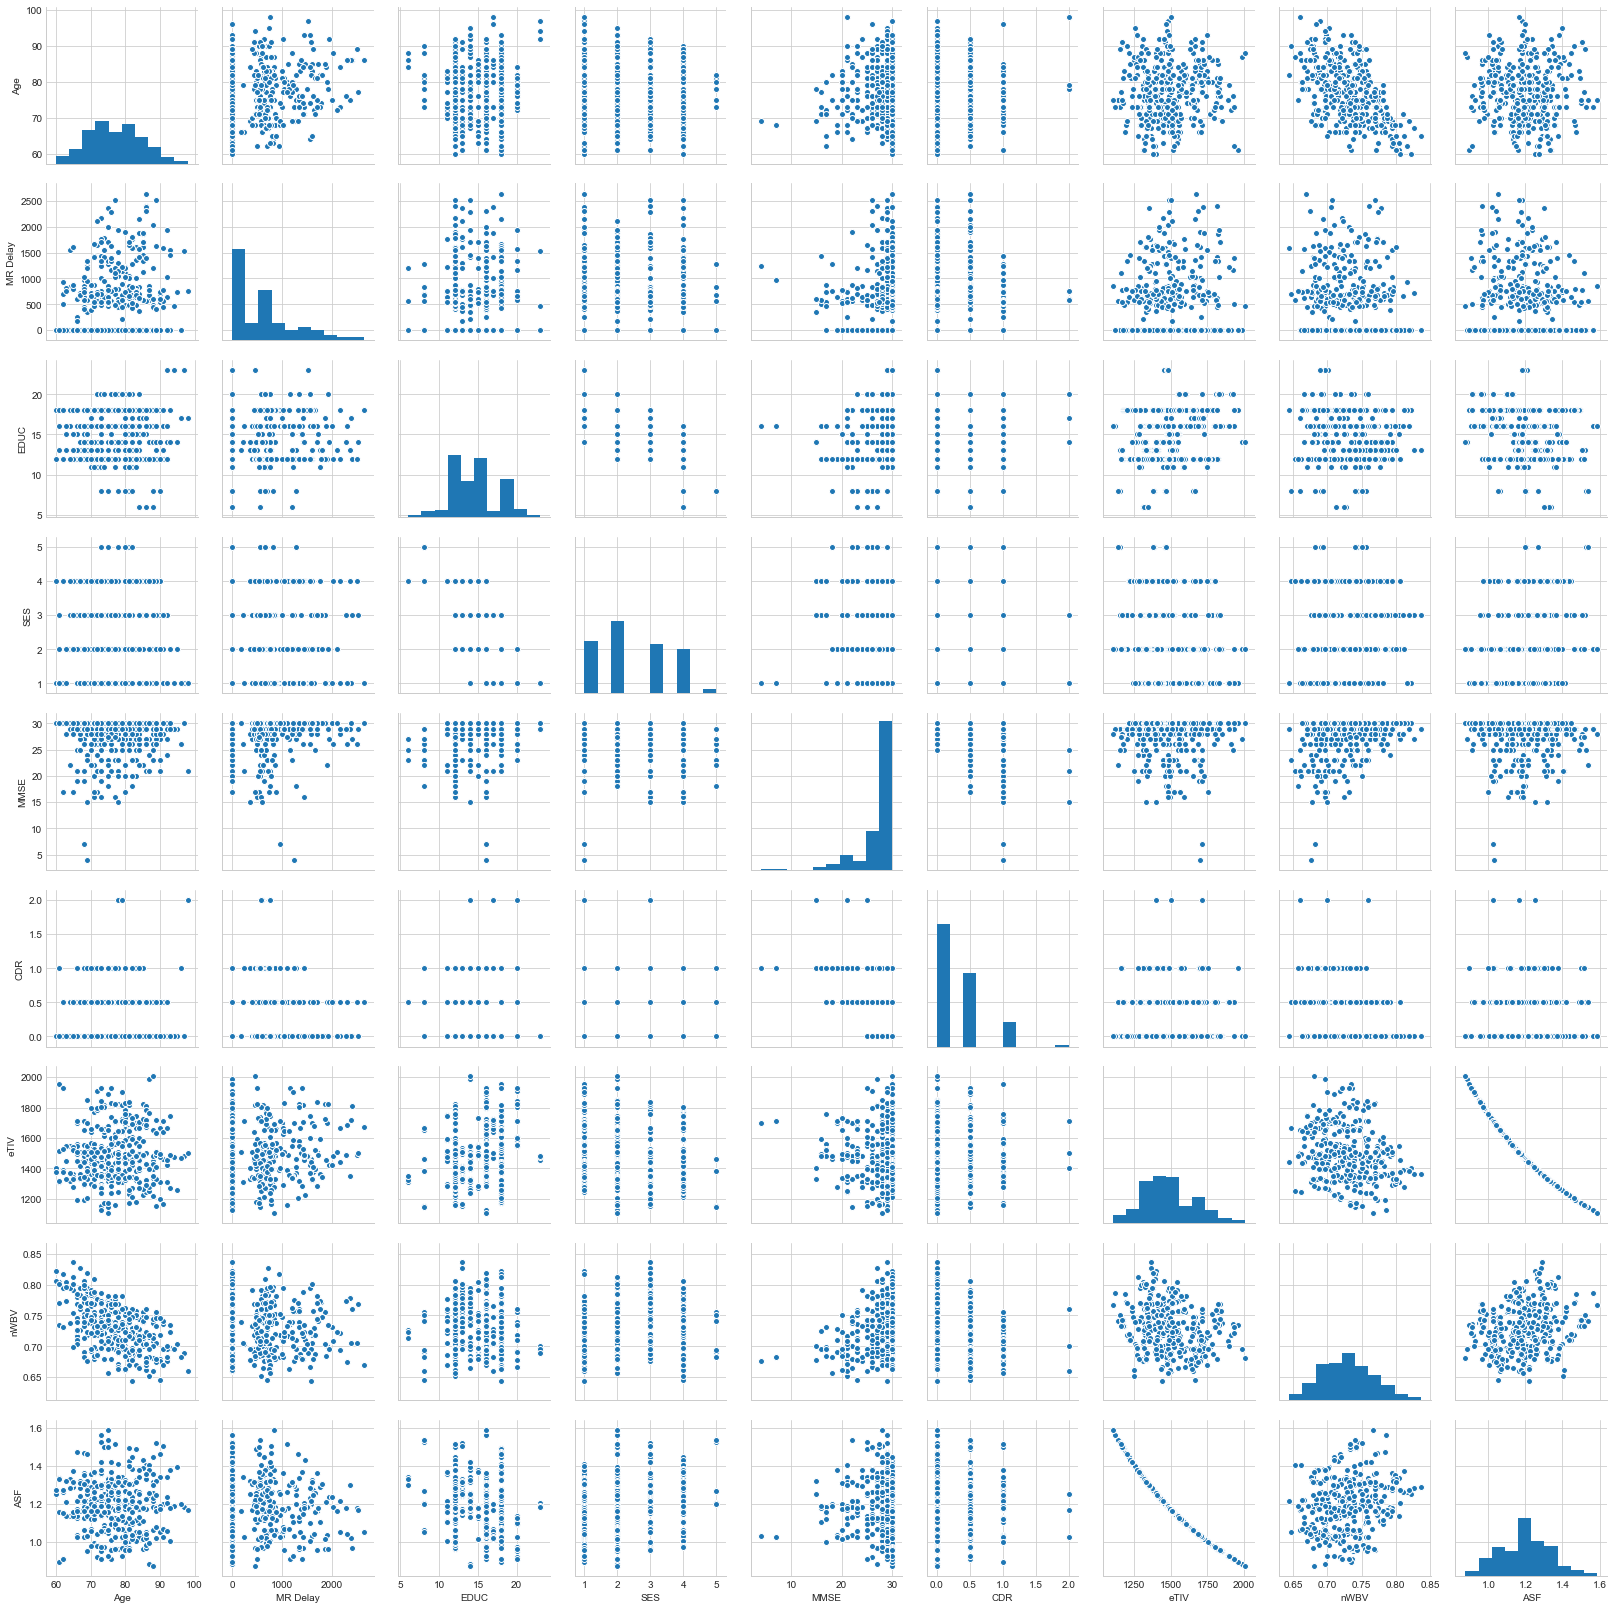

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['Age','MR Delay', 'EDUC', 'SES', 'MMSE', 'CDR','eTIV','nWBV','ASF']
x=df.fillna('')
sns_plot=sns.pairplot(x[cols])

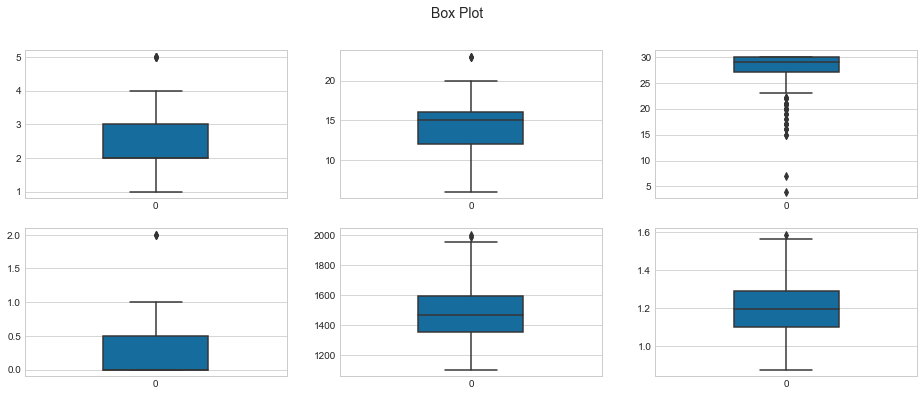

In [18]:
#boxplots which shows the IQR(Interquartile Range )
fig, axes = plt.subplots(2,3,figsize = (16,6))
fig.suptitle("Box Plot",fontsize=14)
sns.set_style("whitegrid")
sns.boxplot(data=df['SES'], orient="v",width=0.4, palette="colorblind",ax = axes[0][0]);
sns.boxplot(data=df['EDUC'], orient="v",width=0.4, palette="colorblind",ax = axes[0][1]);
sns.boxplot(data=df['MMSE'], orient="v",width=0.4, palette="colorblind",ax = axes[0][2]);
sns.boxplot(data=df['CDR'], orient="v",width=0.4, palette="colorblind",ax = axes[1][0]);
sns.boxplot(data=df['eTIV'], orient="v",width=0.4, palette="colorblind",ax = axes[1][1]);
sns.boxplot(data=df['ASF'], orient="v",width=0.4, palette="colorblind",ax = axes[1][2]);
#xlabel("Time");

In [19]:
#convet the charecter data into numeric
group_map = {"Demented": 1, "Nondemented": 0}
df['Group'] = df['Group'].map(group_map)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

In [20]:
obviously_redundant=set(['Subject ID', 'MRI ID'])
all_features=np.array(df.columns)
all_features_except_group=[]
for feature in all_features:
    if(feature!="Group" and feature not in obviously_redundant):
        all_features_except_group.append(feature)




In [21]:
# making useful_dataframe
all_features=[]
for feature in all_features_except_group:
    all_features.append(feature)
    
all_features.append("Group")
useful_dataframe=df[all_features].copy()

In [22]:
useful_dataframe.head()

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0
1,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0
2,1,0,1,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
3,2,560,1,R,76,12,2.0,28.0,0.5,1738,0.713,1.010,1
4,3,1895,1,R,80,12,2.0,22.0,0.5,1698,0.701,1.034,1


In [23]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
# before label encoding
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,R,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,R,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [25]:
# encoding dictionary will be used for encoding data point for prediction
label_encoding_dictionary={}

from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    le.fit(df[column])
    label_encoding_dictionary[column]=[le,set(le.classes_)]
    df[column]=le.transform(df[column])   

In [26]:
# after label encoding
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,0,0,0,1,0,27,5,1,14,0,284,35,1
1,0,1,0,1,15,1,0,28,5,1,18,0,285,20,0
2,1,2,1,0,0,1,0,15,3,1,10,1,231,73,52
3,1,3,1,1,32,1,0,16,3,1,16,1,254,51,32
4,1,4,1,2,185,1,0,20,3,1,9,1,238,40,46


In [27]:
X=df[all_features_except_group].values
Y=df["Group"].values

In [28]:
print(X.shape)
print(Y.shape)

(373, 12)
(373,)


In [29]:
# Feature extraction
features_wanted=6
model = LogisticRegression()
#model=GradientBoostingClassifier()
rfe = RFE(model, features_wanted)


In [30]:
rfe_model = rfe.fit(X, Y)

In [31]:
print("Num Features: %s" % (rfe_model.n_features_))
print("Selected Features: %s" % (rfe_model.support_))
print("Feature Ranking: %s" % (rfe_model.ranking_))

Num Features: 6
Selected Features: [ True False  True False False  True  True  True  True False False False]
Feature Ranking: [1 6 1 7 2 1 1 1 1 4 5 3]


In [32]:
feature_col_names = []
bool_vector=rfe_model.support_
for i in range(len(all_features_except_group)):
    if bool_vector[i]:
        feature_col_names.append(all_features_except_group[i])
print("feature selected are: ")
for selected_feature in feature_col_names:
    print(selected_feature)
    
        
   
    

feature selected are: 
Visit
M/F
EDUC
SES
MMSE
CDR


In [33]:
# printing label encoding dictionary
for features in label_encoding_dictionary:
    print(features)
    print(label_encoding_dictionary[features][0])
    print(label_encoding_dictionary[features][1])    

Subject ID
LabelEncoder()
{'OAS2_0182', 'OAS2_0052', 'OAS2_0008', 'OAS2_0096', 'OAS2_0143', 'OAS2_0021', 'OAS2_0165', 'OAS2_0152', 'OAS2_0118', 'OAS2_0158', 'OAS2_0172', 'OAS2_0183', 'OAS2_0017', 'OAS2_0004', 'OAS2_0034', 'OAS2_0091', 'OAS2_0069', 'OAS2_0109', 'OAS2_0013', 'OAS2_0050', 'OAS2_0097', 'OAS2_0129', 'OAS2_0022', 'OAS2_0175', 'OAS2_0131', 'OAS2_0051', 'OAS2_0041', 'OAS2_0042', 'OAS2_0162', 'OAS2_0028', 'OAS2_0046', 'OAS2_0071', 'OAS2_0014', 'OAS2_0145', 'OAS2_0030', 'OAS2_0060', 'OAS2_0018', 'OAS2_0121', 'OAS2_0009', 'OAS2_0161', 'OAS2_0111', 'OAS2_0140', 'OAS2_0113', 'OAS2_0179', 'OAS2_0012', 'OAS2_0048', 'OAS2_0086', 'OAS2_0139', 'OAS2_0174', 'OAS2_0070', 'OAS2_0164', 'OAS2_0104', 'OAS2_0027', 'OAS2_0114', 'OAS2_0087', 'OAS2_0108', 'OAS2_0063', 'OAS2_0126', 'OAS2_0134', 'OAS2_0144', 'OAS2_0185', 'OAS2_0154', 'OAS2_0066', 'OAS2_0007', 'OAS2_0035', 'OAS2_0138', 'OAS2_0078', 'OAS2_0040', 'OAS2_0054', 'OAS2_0079', 'OAS2_0058', 'OAS2_0100', 'OAS2_0039', 'OAS2_0186', 'OAS2_0005'

LabelEncoder()
{0, 1}
Visit
LabelEncoder()
{1, 2, 3, 4, 5}
MR Delay
LabelEncoder()
{0, 1024, 518, 1033, 525, 1553, 1042, 1554, 1555, 1047, 538, 539, 1563, 552, 553, 558, 560, 561, 563, 1588, 567, 1591, 570, 2107, 1598, 575, 576, 578, 1603, 580, 584, 1608, 1099, 2639, 595, 1107, 597, 600, 1631, 609, 610, 1123, 616, 617, 2153, 621, 622, 1651, 1140, 2163, 1655, 1146, 636, 1663, 640, 642, 643, 647, 652, 1164, 659, 661, 665, 670, 1695, 672, 673, 674, 675, 679, 680, 1192, 1705, 683, 1707, 687, 689, 1713, 691, 1204, 182, 695, 1209, 700, 1212, 706, 707, 1218, 713, 1233, 1234, 723, 212, 726, 1752, 729, 730, 732, 733, 736, 737, 742, 743, 1770, 751, 2288, 754, 1779, 756, 759, 248, 2297, 763, 764, 766, 1281, 1282, 774, 1287, 776, 777, 778, 1290, 1806, 790, 791, 793, 802, 807, 817, 1329, 1331, 828, 1340, 830, 1343, 1345, 2369, 1861, 1351, 842, 846, 1870, 2386, 851, 854, 1884, 352, 2400, 866, 1895, 873, 1387, 365, 881, 1393, 883, 1399, 1412, 1415, 1927, 395, 1933, 1422, 403, 405, 1435, 1438, 932, 14

In [34]:
from sklearn.model_selection import train_test_split
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Nondemented','Demented']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [36]:
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [37]:
total_models = ['SVC','DecisionTreeClassifier','GradientBoostingClassifier','KNeighborsClassifier','LogisticRegression']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAccuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [39]:
# for predicting against 1 datapoint
classifiers={}

### Random Forest Classifier 

Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200}


Confusion Matrix:
[[51  1]
 [ 9 51]]


Classification Report: 
             precision    recall  f1-score   support

          0       0.85      0.98      0.91        52
          1       0.98      0.85      0.91        60

avg / total       0.92      0.91      0.91       112



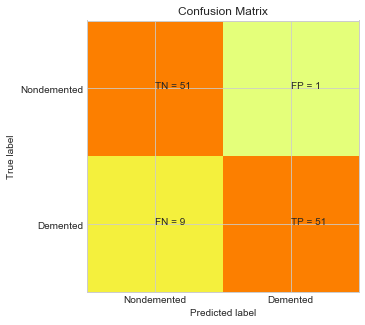

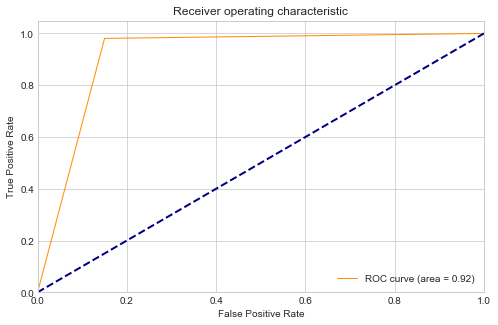


Accuracy Of the Model:  0.9107142857142857 




In [40]:
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')
CV_rfc.fit(X_train, y_train.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc) 
roc_curves(CV_rfc)
accuracy(CV_rfc)
classifiers["Random Forest"]=CV_rfc

### SVM



Confusion Matrix:
[[51  1]
 [ 8 52]]


Classification Report: 
             precision    recall  f1-score   support

          0       0.86      0.98      0.92        52
          1       0.98      0.87      0.92        60

avg / total       0.93      0.92      0.92       112



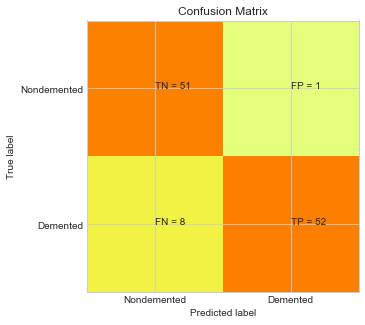

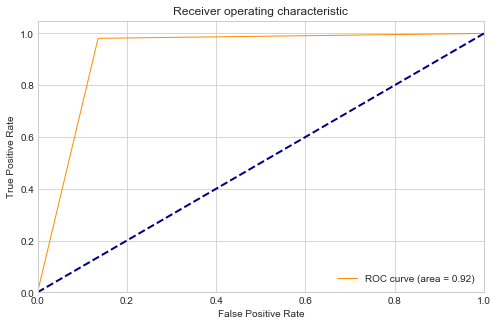


Accuracy Of the Model:  0.9196428571428571 




In [41]:
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
roc_curves(svm)
accuracy(svm)
classifiers["SVM"]=svm

### Decision Tree Classifier



Confusion Matrix:
[[49  3]
 [ 9 51]]


Classification Report: 
             precision    recall  f1-score   support

          0       0.84      0.94      0.89        52
          1       0.94      0.85      0.89        60

avg / total       0.90      0.89      0.89       112



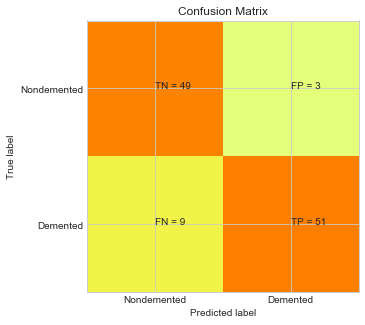

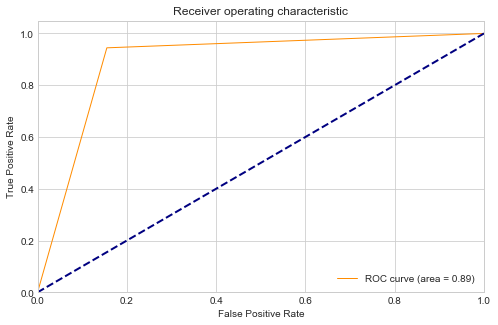


Accuracy Of the Model:  0.8928571428571429 




In [42]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)
classifiers["Decision Tree"]=clf_dtc

### Gradient Boosting Classifier



Confusion Matrix:
[[50  2]
 [ 8 52]]


Classification Report: 
             precision    recall  f1-score   support

          0       0.86      0.96      0.91        52
          1       0.96      0.87      0.91        60

avg / total       0.92      0.91      0.91       112



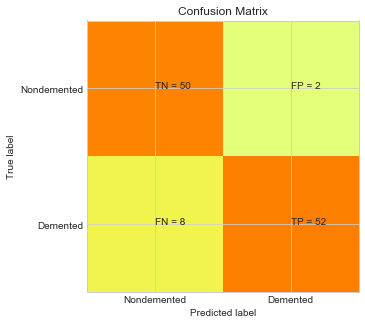

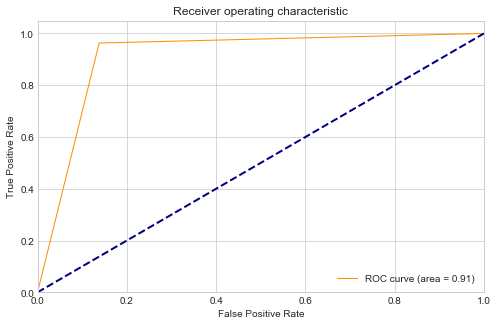


Accuracy Of the Model:  0.9107142857142857 




In [43]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train.ravel())
X = pd.DataFrame(X_train)
report_performance(gb)
roc_curves(gb)
accuracy(gb)
classifiers["Gradient Boosting"]=gb

### KNeighbors Classifier



Confusion Matrix:
[[46  6]
 [ 9 51]]


Classification Report: 
             precision    recall  f1-score   support

          0       0.84      0.88      0.86        52
          1       0.89      0.85      0.87        60

avg / total       0.87      0.87      0.87       112



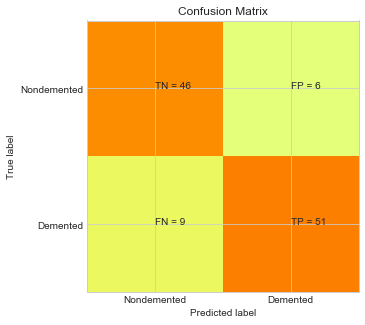

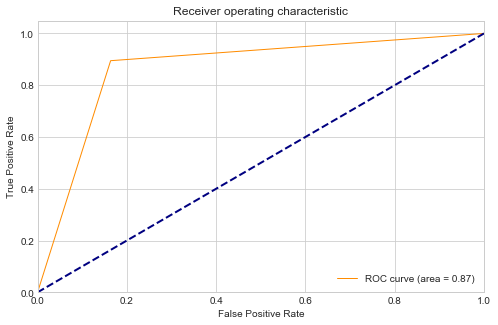


Accuracy Of the Model:  0.8660714285714286 




In [44]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train.ravel())
X = pd.DataFrame(X_train)
report_performance(knn)
roc_curves(knn)
accuracy(knn)
classifiers["KNeighbors"]=knn

### Logistic Regression



Confusion Matrix:
[[49  3]
 [ 8 52]]


Classification Report: 
             precision    recall  f1-score   support

          0       0.86      0.94      0.90        52
          1       0.95      0.87      0.90        60

avg / total       0.91      0.90      0.90       112



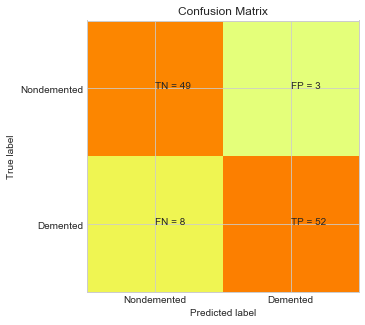

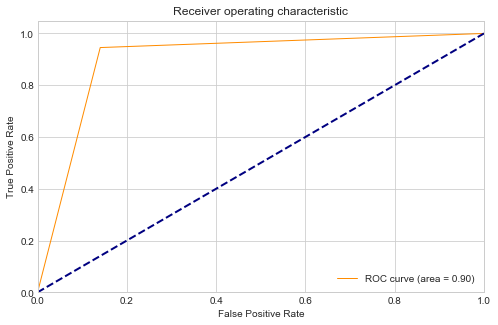


Accuracy Of the Model:  0.9017857142857143 




In [45]:
lr=LogisticRegression(solver='lbfgs',max_iter=7600)
lr.fit(X_train,y_train.ravel())
X = pd.DataFrame(X_train)
report_performance(lr)
roc_curves(lr)
accuracy(lr)
classifiers["Logistic Regression"]=lr

### Accuracy Comparison of Classifiers

In [46]:
data = total_accuracy.values()
labels = ['SVC','Decision Tree','Random Forest','KNeighbors','Logistic Regression','Gradient Boosting']

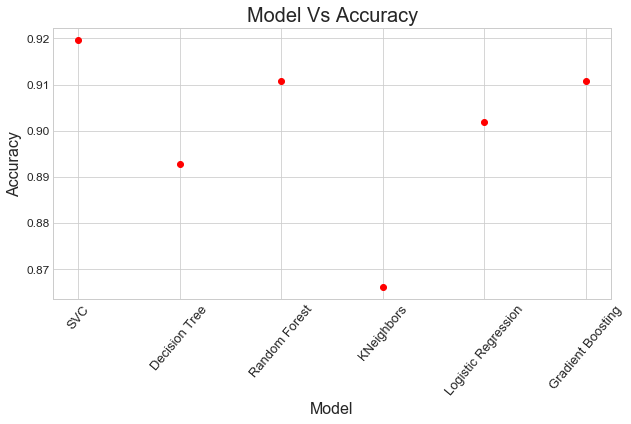

In [47]:
data=list(data)
plt.rcParams["figure.figsize"] = [10,5]
plt.title("Model Vs Accuracy",fontsize = 20)
plt.xlabel('Model',fontsize = 16)
plt.ylabel('Accuracy',fontsize = 16)
plt.xticks([i for i, e in enumerate(labels)], [l[0:20] for l in labels],rotation = 50,fontsize=13)
plt.yticks(fontsize=12)  
plt.plot([i for i, e in enumerate(data)], data, 'ro')
plt.show()

### Comparison of Different Classifiers on User Input

In [48]:
# data_visualized dataframe
useful_dataframe.head()

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883,0
1,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876,0
2,1,0,1,R,75,12,2.0,23.0,0.5,1678,0.736,1.046,1
3,2,560,1,R,76,12,2.0,28.0,0.5,1738,0.713,1.010,1
4,3,1895,1,R,80,12,2.0,22.0,0.5,1698,0.701,1.034,1


In [49]:
type_dictionary={}
for column in label_encoding_dictionary:
    this_column_classes=label_encoding_dictionary[column][1]
    for i in this_column_classes:
        type_dictionary[column]=type(i)
        break

In [50]:
# returns dataframe corresponding to the input array
def computeDataframe(X_input):
    X_reshaped=np.array(X_input).reshape(1,len(X_input))
    
    X_dataframe=pd.DataFrame(data=X_reshaped,columns=all_features_except_group)
    for column in X_dataframe.columns:
        X_dataframe[column][0]=type_dictionary[column](X_dataframe[column][0])
    return X_dataframe   

In [51]:
# function will be used when label encoder fails , predicts the closest class to be predicted class
def find_closest_class(class_set,not_found_class):
    min_dist=1000000
    min_dist_class=0
    for each_class in class_set:
        dist_from_class=abs(each_class-not_found_class)
        if dist_from_class<min_dist:
            min_dist=dist_from_class
            min_dist_class=each_class
    return min_dist_class

In [52]:
# encode the dataframe according to the label encoder
def computeEncodedDataframe(X_dataframe):
    for column in X_dataframe.columns:
        this_column_label_encoder=label_encoding_dictionary[column][0]
        this_column_classes=label_encoding_dictionary[column][1]
        
        if(X_dataframe[column][0] in this_column_classes):
            X_dataframe[column]=this_column_label_encoder.transform(X_dataframe[column])
        else:
            predicted_class=find_closest_class(this_column_classes,X_dataframe[column][0])
            X_dataframe[column][0]=predicted_class
            X_dataframe[column]=this_column_label_encoder.transform(X_dataframe[column])

In [53]:
# computing inverse of the dataframe
def computeInverseDataframe(X_dataframe):
    for column in X_dataframe.columns:
        this_column_label_encoder=label_encoding_dictionary[column][0]
        this_column_classes=label_encoding_dictionary[column][1]
        X_dataframe[column]=this_column_label_encoder.inverse_transform(X_dataframe[column])

In [54]:
# plotting the predictions of each model 
def plot_input_classifier(encoded_dataframe):
    x = []
    y = []

    for classifier in classifiers:
        x.append(classifier)
        y.append(classifiers[classifier].predict(encoded_dataframe[feature_col_names])[0])
    
    plt.rcParams["figure.figsize"] = [10,5] 
    plt.title("Model Vs Groups",fontsize = 20)
    plt.xlabel('Model',fontsize = 16)
    plt.ylabel('Groups',fontsize = 16)
    plt.xticks([i for i, e in enumerate(x)], [l[0:20] for l in x],rotation = 50,fontsize=13)
    plt.yticks(np.arange(0,4,1),fontsize=15)
    plt.plot([i for i, e in enumerate(y)], y, 'ro')
    x=np.arange(0,len(x),1)
    for i in range(len(x)):
        if(y[i]):
            plt.text(x[i],y[i],'  Demented',fontsize=12,rotation = 0) 
        else:
            plt.text(x[i],y[i],'  Non-Demented',fontsize=12,rotation = 0) 
    plt.show()

In [55]:
# general root function for passing input array and pltting its predictions
def plot_input_data(X_input):
    X_dataframe=computeDataframe(X_input)
    print("input dataframe: ")
    print(X_dataframe)
    print()
    computeEncodedDataframe(X_dataframe)
    print("encoded dataframe: ")
    print(X_dataframe)
    print()
    inverse_dataframe=X_dataframe.copy()
    computeInverseDataframe(inverse_dataframe)
    print("inverse dataframe: ")
    print(inverse_dataframe)
    print()
    plot_input_classifier(X_dataframe)

input dataframe: 
  Visit MR Delay M/F Hand Age EDUC SES MMSE CDR  eTIV   nWBV    ASF
0     1        0   1    R  87   14   2   27   0  1223  0.696  0.883

encoded dataframe: 
   Visit  MR Delay  M/F  Hand  Age  EDUC  SES  MMSE  CDR  eTIV  nWBV  ASF
0      0         0    1     0   27     5    1    14    0    17    35    1

inverse dataframe: 
   Visit  MR Delay  M/F Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0      1         0    1    R   87    14  2.0  27.0  0.0  1225  0.696  0.883



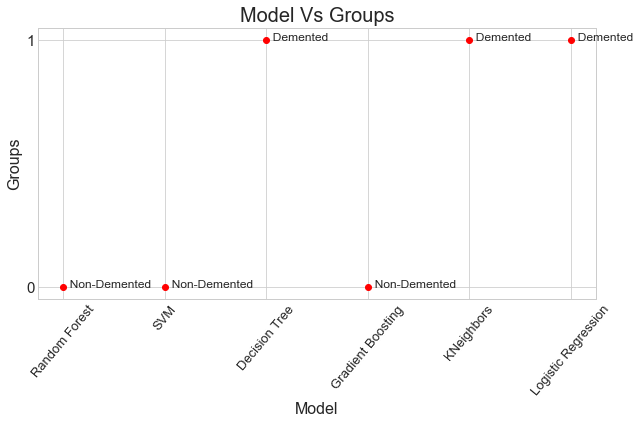

In [56]:
# function call for plotting a random input according to the classifier
import warnings
warnings.filterwarnings('ignore')
# ['Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

X_input=[1,0,1 ,'R' ,87 ,14, 2.0 ,27.0 ,0.0 ,1223,0.696, 0.883]

    
plot_input_data(X_input)


In [57]:
# numpy array of values in dataframe
original_dataframe_numpy_arr=useful_dataframe.values
rows=original_dataframe_numpy_arr.shape[0]
cols=original_dataframe_numpy_arr.shape[1]


In [58]:
# return random index in range 
import random
def random_index(last_index):
    return random.randint(0, last_index)


In [59]:
# plotting actual dataframe values and reverse engineering the models 
def plot_random_dataset_input():
    rand_index=random_index(rows-1)
    input_arr=original_dataframe_numpy_arr[rand_index][0:cols-1]
    actual_output=original_dataframe_numpy_arr[rand_index][cols-1]
    print("actual output:")
    if(actual_output==1):
        print("DEMETIC")
    else:
        print("NON DEMENTIC")
    print()
    plot_input_data(input_arr)


actual output:
DEMETIC

input dataframe: 
  Visit MR Delay M/F Hand Age EDUC SES     MMSE CDR  eTIV   nWBV    ASF
0     2      539   0    R  75   12   2  27.3423   1  1169  0.742  1.501

encoded dataframe: 
   Visit  MR Delay  M/F  Hand  Age  EDUC  SES  MMSE  CDR  eTIV  nWBV  ASF
0      1        28    0     0   15     3    1    15    2     7    79  257

inverse dataframe: 
   Visit  MR Delay  M/F Hand  Age  EDUC  SES       MMSE  CDR  eTIV   nWBV  \
0      2       539    0    R   75    12  2.0  27.342318  1.0  1169  0.742   

     ASF  
0  1.501  



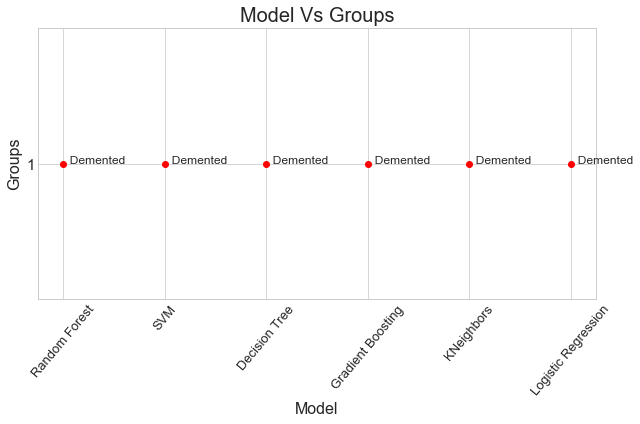

In [60]:
# function call for plotting predictions random index array from the original dataset 
plot_random_dataset_input()
